In [90]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, metrics, preprocessing
from sklearn.decomposition import PCA
from sklearn import tree

import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
# #import pydotplus
from IPython.display import Image

In [5]:
''''
Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
''''

SyntaxError: EOL while scanning string literal (<ipython-input-5-42dfaabf7449>, line 85)

In [ ]:
# raw_df[['a', 'b']] = df[['a','b']].fillna(value=0)

## Deleted the attributes with null values > 2000 & if any row has a blank cell

In [91]:
raw_df = pd.read_csv('housingdata.csv')
raw_df.drop(columns=['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
raw_df.dropna(inplace=True)

print(raw_df.head())
#df.dropna(how='any')
#raw_df.drop(columns=['GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','SaleType','GarageType','FireplaceQu','Functional','KitchenQual','BsmtFullBath','BsmtHalfBath','TotalBsmtSF','MSZoning','LotFrontage','Utilities','MasVnrType','MasVnrArea','Exterior1st','Exterior2nd','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','Electrical'],axis=0)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   
6   7          20       RL         75.0    10084   Pave      Reg         Lvl   

  Utilities LotConfig    ...     EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
1    AllPub       FR2    ...                 0         0           0        0   
2    AllPub    Inside    ...                 0         0           0        0   
3    AllPub    Corner    ...               272         0           0        0   
4    AllPub       FR2    ...                 0         0           0        0   
6    AllPub    Inside    ...                 0         0           0        0   

  MiscVal MoSold  Soldfrom  Sale

In [92]:
#print(raw_df.describe())
#print(raw_df.columns)
print(raw_df.isnull().sum(axis=0))


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [93]:
def col_count_plot(col):
    data = raw_df[col]
    names = data.value_counts().index
    values = data.value_counts().values
    pos = range(len(values))
    plt.bar(pos, values)
    plt.xticks(pos, names)
    plt.ylabel('Count')
    plt.title(col)
    plt.show()

In [ ]:

# raw_df.iloc[subset,:]

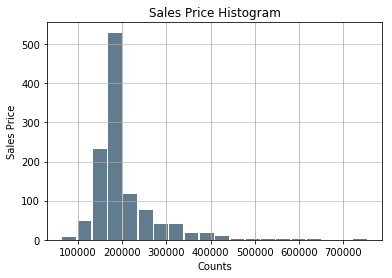

In [94]:
raw_df.iloc[:,76].hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Sales Price Histogram')
plt.xlabel('Counts')
plt.ylabel('Sales Price')
plt.grid(axis='y', alpha=0.75)

# Coding Categorical Data

In [95]:
# df = pd.get_dummies(raw_df, columns=['MSZoning', 'Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'])
# # made change in line below
# #names =[col for col in df.columns]
# #names =[col for col in df.columns if col not in ['MSZoning', 'Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']
#X = df[names]
#y = np.where(df['SalePrice'])

# plt.figure(dpi=120)
# plt.imshow(X.corr().values)
# plt.xticks(range(len(names)), names, rotation='vertical')
# plt.yticks(range(len(names)), names, rotation='horizontal')

# raw_df['MSZoning'] = raw_df['MSZoning'].astype('category')
# raw_df.dtypes
# raw_df.drop(columns=['MSZoning_cat'],inplace=True)

raw_df['MSZoning_Cat'] = raw_df['MSZoning'].cat.codes
print(raw_df)
          
''

AttributeError: Can only use .cat accessor with a 'category' dtype

# Normalizing Data and Dividing the Data set into Testing and Training:
##### 20% testing, and 80% training


In [124]:
# 20% of data testing
x=raw_df[raw_df.columns[:-1]]

#df_out = raw_df['MSSubClass']

#X_train = features[:-229]
#X_test = features[-229:]

#print X_test

#y= np.where(raw_df['SalePrice'])
y= np.array(raw_df['SalePrice'])

print x.values, y
#pd.to_numeric(y, downcast='integer')

#y_train = y[:-229]
#y_test = y[-229:]


X_train, X_test, y_train, y_test = model_selection.train_test_split(x.values, y, test_size=0.25, random_state=1145)
print(X_train, X_test, y_train, y_test)

# Normalization 
#scaler = preprocessing.MinMaxScaler()
#scaler.fit_transform(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

[[2L 20L 'RL' ... 12L 'WD' 'Normal']
 [3L 60L 'RL' ... 11L 'WD' 'Normal']
 [4L 70L 'RL' ... 13L 'WD' 'Abnorml']
 ...
 [2912L 20L 'RL' ... 13L 'WD' 'Normal']
 [2917L 20L 'RL' ... 13L 'WD' 'Abnorml']
 [2919L 60L 'RL' ... 13L 'WD' 'Normal']] [181500.     223500.     140000.     ... 188506.4314 219222.4234
 187741.8667]
(array([[773L, 80L, 'RL', ..., 9L, 'WD', 'Abnorml'],
       [2649L, 20L, 'RL', ..., 13L, 'WD', 'Normal'],
       [1495L, 60L, 'RL', ..., 9L, 'WD', 'Normal'],
       ...,
       [1375L, 60L, 'FV', ..., 11L, 'WD', 'Normal'],
       [1670L, 20L, 'RL', ..., 10L, 'WD', 'Normal'],
       [425L, 20L, 'RL', ..., 11L, 'WD', 'Normal']], dtype=object), array([[358L, 120L, 'RM', ..., 12L, 'WD', 'Normal'],
       [629L, 60L, 'RL', ..., 12L, 'WD', 'Family'],
       [1146L, 50L, 'RM', ..., 13L, 'WD', 'Family'],
       ...,
       [1356L, 80L, 'RL', ..., 13L, 'WD', 'Normal'],
       [1223L, 50L, 'RL', ..., 12L, 'WD', 'Normal'],
       [2828L, 60L, 'RL', ..., 13L, 'WD', 'Abnorml']], dtype=o

## Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.predict_proba(X_test))
print(model.coef_)

In [ ]:
metrics.confusion_matrix(y_test, y_pred)
#            Predict No     Predict Yes
#Actual No
#Actual Yes

In [ ]:
def logistic_scoring(X, y, scoring, seed=7):
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    model = LogisticRegression()
    results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    print("{0}: {1:.3f} ({2:.3f})".format(scoring, results.mean(), results.std()))

In [ ]:
logistic_scoring(X, y, 'accuracy')
logistic_scoring(X, y, 'neg_log_loss')
logistic_scoring(X, y, 'roc_auc')